### K近邻算法：指明k数据，已经有的数据离新的数据点最近的k个点，按照自己的label 标签，然后按照少数服从多数原则，猜测这个新的数据点的label。两个样本的相似性就是按照两个点的距离来猜测的 。   应用于监督学习的分类问题

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

#### 肿瘤的应用





In [2]:
raw_data_x=np.random.random((10,2))
print(raw_data_x)
raw_data_y=[0,0,0,0,0,1,1,1,1,1]
print(raw_data_y)

[[0.50001796 0.22488252]
 [0.22971745 0.3871965 ]
 [0.7466522  0.45110399]
 [0.49259954 0.70267665]
 [0.89221784 0.2899099 ]
 [0.54535607 0.206565  ]
 [0.70988327 0.92981913]
 [0.73064446 0.68076804]
 [0.654964   0.96048324]
 [0.86868721 0.77458725]]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [3]:
x_train=np.array(raw_data_x)   #需要将数据改为 numpy 数据类型的
y_train=np.array(raw_data_y)

print(x_train)
print(y_train)


[[0.50001796 0.22488252]
 [0.22971745 0.3871965 ]
 [0.7466522  0.45110399]
 [0.49259954 0.70267665]
 [0.89221784 0.2899099 ]
 [0.54535607 0.206565  ]
 [0.70988327 0.92981913]
 [0.73064446 0.68076804]
 [0.654964   0.96048324]
 [0.86868721 0.77458725]]
[0 0 0 0 0 1 1 1 1 1]


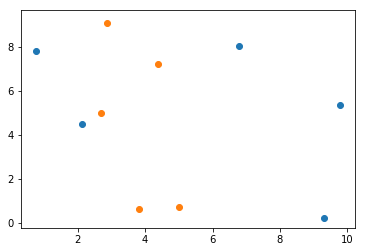

In [25]:
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],label="1")  # 只是先选择了两个特征进行画图，
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],label="2")  #
plt.show()

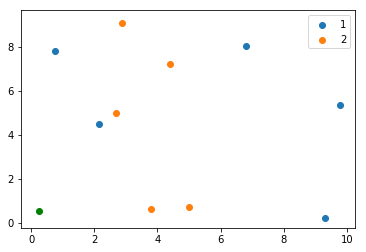

In [26]:
x=np.array([0.233,0.55])
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],label="1")
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],label="2")
plt.legend()
plt.scatter(x[0],x[1],color='g')
plt.show()

## KNN算法的主要过程

In [27]:
from math import sqrt
distances=[]
for node in x_train:      
    d=sqrt(np.sum((node-x)**2))     
    distances.append(d)
distances

[7.268542729359302,
 7.868680753468151,
 10.701403277235439,
 4.781246036767512,
 5.079503510247729,
 9.954166484431163,
 3.578083059452601,
 8.946917285261245,
 4.402725095839782,
 9.084048640829858]

### 下面的这个方法就是找出k个近邻的点的坐标

In [28]:
ans=np.argsort(distances)  
print(ans)


[6 8 3 4 0 1 7 9 5 2]


In [29]:
k=6
topky=[y_train[i] for i in ans[:k]]  #找出其中
topky   #直接找到这几个点，确实python 中的操作好多

[1, 0, 1, 1, 0, 1]

###  下面有一个操作，colections 中的Counter 操作，返回字 ，相当于map 操作，计数其中的数据

In [30]:
from collections import Counter
Counter(topky) 

Counter({1: 4, 0: 2})

In [31]:
votes=Counter(topky)
votes.most_common(1)     #从中取出 票数最多的那个

[(1, 4)]

### .most_common(x) x>1的时候，返回的是字典，一个时候是一个列表（其中元素是元组），所以我们要取出数据

In [32]:
a=votes.most_common(1)[0][0]  #
a   #新数据的  测试结果
predict_y=a

In [33]:
predict_y

1

###  总结一下KNN算法的实现
1.换成np数组的数据
2.使用向量之间的简单操作算出新数据点与其他各点之间距离

3.使用argsort找到索引，

In [34]:
import numpy as np
import math


In [35]:
import matplotlib.pyplot as plt
a=np.array([1,0,1,1,0,0,0,1,0,1])

b=np.random.uniform(1,10,size=(10,3))
print(b)
print(a)


[[4.3514622  5.29661039 4.29301347]
 [8.54126195 7.91782756 3.82595209]
 [6.15362799 3.48444143 5.07558639]
 [4.17680529 6.91659517 4.33315975]
 [5.1318368  7.4739171  4.71692646]
 [9.15780942 2.62406457 7.67006986]
 [4.80136639 4.83808215 6.70941882]
 [5.70615581 4.73397381 1.01284193]
 [1.83036111 7.38454954 5.71911037]
 [7.26544417 9.59921491 7.14622469]]
[1 0 1 1 0 0 0 1 0 1]


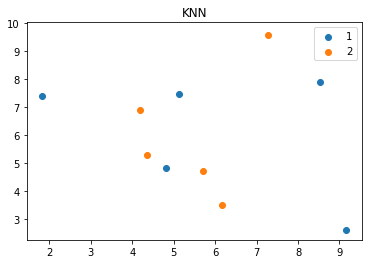

In [36]:
plt.scatter(b[a==0,0],b[a==0,1],label='1')  
plt.scatter(b[a==1,0],b[a==1,1],label="2")
plt.legend()      
plt.title("KNN")   
plt.show()

In [37]:
new_node=np.array([1.13,2.123,7.123])
print(new_node)

[1.13  2.123 7.123]


In [38]:
distance=[sqrt(sum((i-new_node)**2)) for i in b]
print(b)

[[4.3514622  5.29661039 4.29301347]
 [8.54126195 7.91782756 3.82595209]
 [6.15362799 3.48444143 5.07558639]
 [4.17680529 6.91659517 4.33315975]
 [5.1318368  7.4739171  4.71692646]
 [9.15780942 2.62406457 7.67006986]
 [4.80136639 4.83808215 6.70941882]
 [5.70615581 4.73397381 1.01284193]
 [1.83036111 7.38454954 5.71911037]
 [7.26544417 9.59921491 7.14622469]]


In [39]:
print(distance)

[5.334645762756141, 9.968819137525879, 5.593054932626982, 6.328094953494227, 7.101844935709649, 8.062014342418818, 4.5849374792145685, 8.0679872277203, 5.490474968323902, 9.671504738442039]


In [40]:
k=6 
paixu=np.argsort(distance)
print(paixu)

[6 0 8 2 3 4 5 7 9 1]


In [41]:
ans=[a[i] for i in paixu[:k]]
print(ans)
from collections import Counter
now=Counter(ans)

final=now.most_common(2)
print(final)


[0, 1, 0, 1, 1, 0]
[(0, 3), (1, 3)]


###  再来一个样例
####   还有一个很重要的应用，是 np.random.uniform(0,10,size=(3,3))

In [42]:
np.random.seed(100)
a=np.random.uniform(0,10,size=(3,5))
print(a)


[[5.43404942 2.78369385 4.24517591 8.44776132 0.04718856]
 [1.21569121 6.70749085 8.25852755 1.3670659  5.75093329]
 [8.91321954 2.09202122 1.8532822  1.0837689  2.19697493]]


In [43]:
import numpy as np
import matplotlib as mpl
import math
import matplotlib.pyplot as plt
from collections import Counter

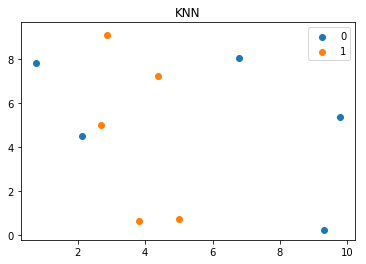

1


In [44]:
def knn(x_train,y_train,k,new_node):
    ans=[sqrt(sum(i-new_node)**2) for i in x_train]
    sort_ans=np.argsort(ans)
    return Counter(y_train[sort_ans[:k]]).most_common(1)[0][0]
def pltnow(x_train,y_train):
    plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],label='0')
    plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],label='1')
    plt.legend()
    plt.title('KNN')
    plt.show()


np.random.seed(7)
x_train=np.random.uniform(0,10,size=(10,2))
b=np.random.randint(0,10,size=(10))
np.random.shuffle(b)
y_train=np.array([1 if i%2==0 else 0 for i in b])
pltnow(x_train,y_train)
print(knn(x_train,y_train,3,[4,1]))



In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [70]:
iris=datasets.load_iris()
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=666)
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)
print(x_train)     #  一共有4个特征， 
print(y_train)

(120, 4)
(120,)
(30, 4)
(30,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [5.7 2.8 4.1 1.3]
 [6.2 3.4 5.4 2.3]
 [5.1 2.5 3.  1.1]
 [7.  3.2 4.7 1.4]
 [6.1 2.6 5.6 1.4]
 [7.6 3.  6.6 2.1]
 [5.2 4.1 1.5 0.1]
 [6.2 2.2 4.5 1.5]
 [7.3 2.9 6.3 1.8]
 [6.4 3.2 5.3 2.3]
 [6.  3.4 4.5 1.6]
 [5.2 2.7 3.9 1.4]
 [5.4 3.7 1.5 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.5 1.6 0.6]
 [4.4 2.9 1.4 0.2]
 [5.8 2.7 3.9 1.2]
 [5.2 3.4 1.4 0.2]
 [4.6 3.4 1.4 0.3]
 [6.5 3.2 5.1 2. ]
 [5.7 2.9 4.2 1.3]
 [6.6 3.  4.4 1.4]
 [6.  2.9 4.5 1.5]
 [4.7 3.2 1.6 0.2]
 [4.9 3.6 1.4 0.1]
 [6.7 3.1 5.6 2.4]
 [6.3 2.7 4.9 1.8]
 [6.1 2.8 4.7 1.2]
 [6.2 2.8 4.8 1.8]
 [5.7 4.4 1.5 0.4]
 [6.3 2.5 4.9 1.5]
 [6.4 2.9 4.3 1.3]
 [5.1 3.8 1.9 0.4]
 [6.8 2.8 4.8 1.4]
 [5.1 3.5 1.4 0.3]
 [4.3 3.  1.1 0.1]
 [5.9 3.  5.1 1.8]
 [6.4 2.8 5.6 2.1]
 [5.6 2.8 4.9 2. ]
 [5.5 2.4 3.7 1. ]
 [6.9 3.1 4.9 1.5]
 [6.3 3.4 5.6 2.4]
 [6.5 3.  5.8 2.2]
 [5.7 3.8 1.7 0.3]
 [6.6 2.9 4.6 1.3]
 [6.7 3.3 5.7 2.5]
 [4.8 3.  1.4 0.1]
 [5.  3.6 1.4 0.2]
 [6.  3.  4.8 1.8]
 

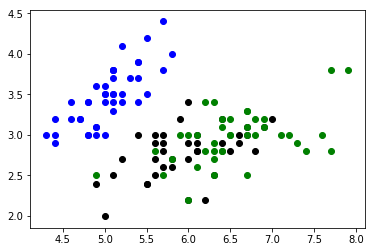

In [111]:
plt.scatter( x_train[y_train==0,0],x_train[y_train==0,1],c='b')     #自变量就是 特征，画图的时候，你就只能画出
plt.scatter( x_train[y_train==1,0],x_train[y_train==1,1],c='black')
plt.scatter( x_train[y_train==2,0],x_train[y_train==2,1],c='g')
plt.show()
